<a href="https://colab.research.google.com/github/Wiritpon-code/Project-University/blob/main/power_nap_vs_coffee_effectiveness_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/power_nap_vs_coffee_effectiveness_dataset.csv')


In [ ]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information (data types and non-null counts):")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of the DataFrame:
   participant_id  age            occupation  sleep_hours_previous_night  \
0               1   24  Working Professional                         5.4   
1               2   37               Student                         5.6   
2               3   32  Working Professional                         4.4   
3               4   28               Student                         6.9   
4               5   25  Working Professional                         4.7   

  intervention_type  intervention_duration_minutes  alertness_score_before  \
0         Power Nap                             15                      62   
1         Power Nap                             30                      67   
2            Coffee                             30                      44   
3            Coffee                             30                      59   
4         Power Nap                             30                      40   

   alertness_score_after  productivity_rati

**Reasoning**:
I have already covered instructions 1, 2, and 3 of the subtask by displaying the first 5 rows, DataFrame information, and descriptive statistics. Now, to complete the subtask, I will check for duplicate rows in the DataFrame to address instruction 4.



In [ ]:
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


## Handle Missing Values

### Subtask:
จัดการกับค่าที่ขาดหายไป (Missing Values) ใน DataFrame `df` โดยพิจารณาวิธีที่เหมาะสมที่สุด เช่น การเติมค่าหรือการลบแถว


**Reasoning**:
I will display the number of missing values per column to confirm the presence of missing values, as a prelude to handling them. This addresses the first instruction to identify columns with missing values.



In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
participant_id                     0
age                                0
occupation                         0
sleep_hours_previous_night         0
intervention_type                  0
intervention_duration_minutes      0
alertness_score_before             0
alertness_score_after              0
productivity_rating                0
mood_rating                        0
side_effects                     207
dtype: int64


**Reasoning**:
Based on the previous output, the `side_effects` column has 207 missing values. I will fill these missing values with the string 'No Side Effect' as per instruction 2, and then verify that all missing values have been handled by rechecking the null counts, addressing instruction 3.



In [ ]:
df['side_effects'] = df['side_effects'].fillna('No Side Effect')

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
participant_id                   0
age                              0
occupation                       0
sleep_hours_previous_night       0
intervention_type                0
intervention_duration_minutes    0
alertness_score_before           0
alertness_score_after            0
productivity_rating              0
mood_rating                      0
side_effects                     0
dtype: int64


## Handle Outliers

### Subtask:
ระบุและจัดการกับค่าผิดปกติ (Outliers) ใน DataFrame `df` โดยใช้เทคนิคที่เหมาะสม


**Reasoning**:
To begin identifying outliers as per instruction 1 of the subtask, I will generate box plots for the specified numerical columns: 'age', 'sleep_hours_previous_night', 'intervention_duration_minutes', 'alertness_score_before', 'alertness_score_after', 'productivity_rating', and 'mood_rating'. This visualization will help in understanding the data distribution and visually detecting potential outliers.



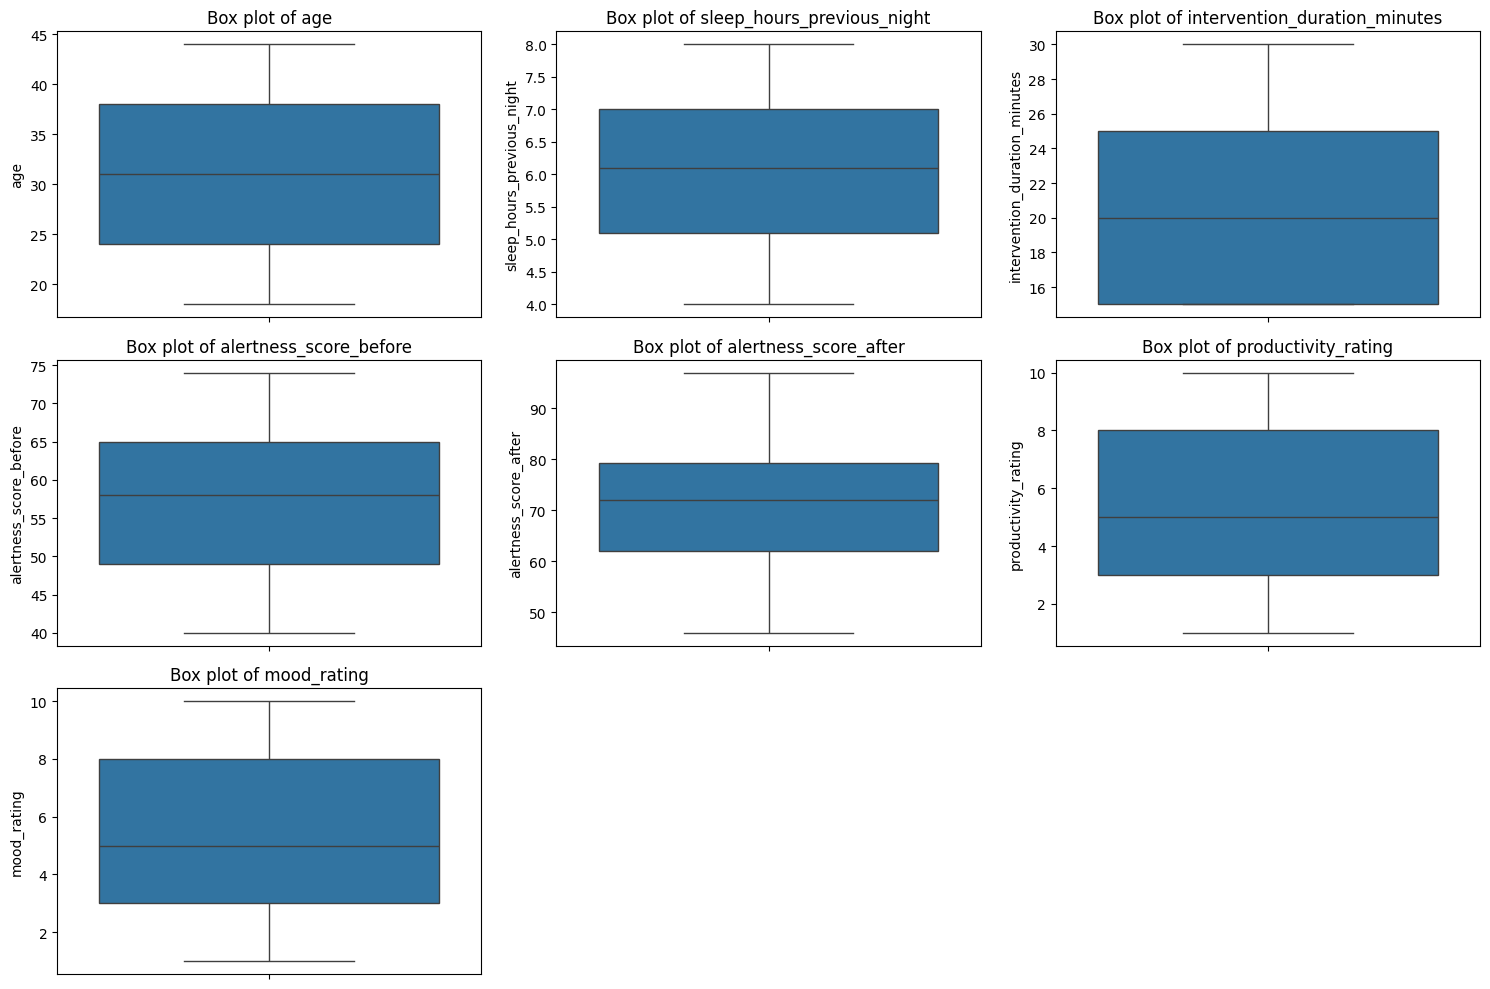

Generated box plots for numerical columns to visualize outliers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_cols = [
    'age',
    'sleep_hours_previous_night',
    'intervention_duration_minutes',
    'alertness_score_before',
    'alertness_score_after',
    'productivity_rating',
    'mood_rating'
]

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()
print("Generated box plots for numerical columns to visualize outliers.")

**Reasoning**:
Now that the box plots have been generated for visual inspection of outliers (Instruction 1), I will proceed with calculating the IQR, defining the lower and upper bounds, counting the outliers, and then capping them for each numerical column as per instructions 2, 3, 4, and 5 of the subtask.



In [ ]:
print("\nOutlier Analysis and Capping:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}':")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {outliers_count}")

    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"  Outliers in '{col}' have been capped.")

print("\nDescriptive statistics after outlier capping:")
print(df[numerical_cols].describe())


Outlier Analysis and Capping:
Column 'age':
  Q1: 24.0, Q3: 38.0, IQR: 14.0
  Lower Bound: 3.0, Upper Bound: 59.0
  Number of outliers: 0
  Outliers in 'age' have been capped.
Column 'sleep_hours_previous_night':
  Q1: 5.1, Q3: 7.0, IQR: 1.9000000000000004
  Lower Bound: 2.249999999999999, Upper Bound: 9.850000000000001
  Number of outliers: 0
  Outliers in 'sleep_hours_previous_night' have been capped.
Column 'intervention_duration_minutes':
  Q1: 15.0, Q3: 25.0, IQR: 10.0
  Lower Bound: 0.0, Upper Bound: 40.0
  Number of outliers: 0
  Outliers in 'intervention_duration_minutes' have been capped.
Column 'alertness_score_before':
  Q1: 49.0, Q3: 65.0, IQR: 16.0
  Lower Bound: 25.0, Upper Bound: 89.0
  Number of outliers: 0
  Outliers in 'alertness_score_before' have been capped.
Column 'alertness_score_after':
  Q1: 62.0, Q3: 79.25, IQR: 17.25
  Lower Bound: 36.125, Upper Bound: 105.125
  Number of outliers: 0
  Outliers in 'alertness_score_after' have been capped.
Column 'productivit

## Generate Data Insights and Visualizations

### Subtask:
วิเคราะห์ข้อมูลที่ทำความสะอาดแล้วเพื่อหาข้อมูลเชิงลึกที่สำคัญ และสร้างภาพประกอบข้อมูล (เช่น กราฟ) เพื่อแสดงผลลัพธ์ โดยต้องมีคำอธิบายประกอบ


**Reasoning**:
I will create box plots to compare 'alertness_score_after', 'productivity_rating', and 'mood_rating' between 'Power Nap' and 'Coffee' intervention types, as specified in instructions 1, 2, and 3 of the subtask. This will help visualize the impact of each intervention on these key metrics.



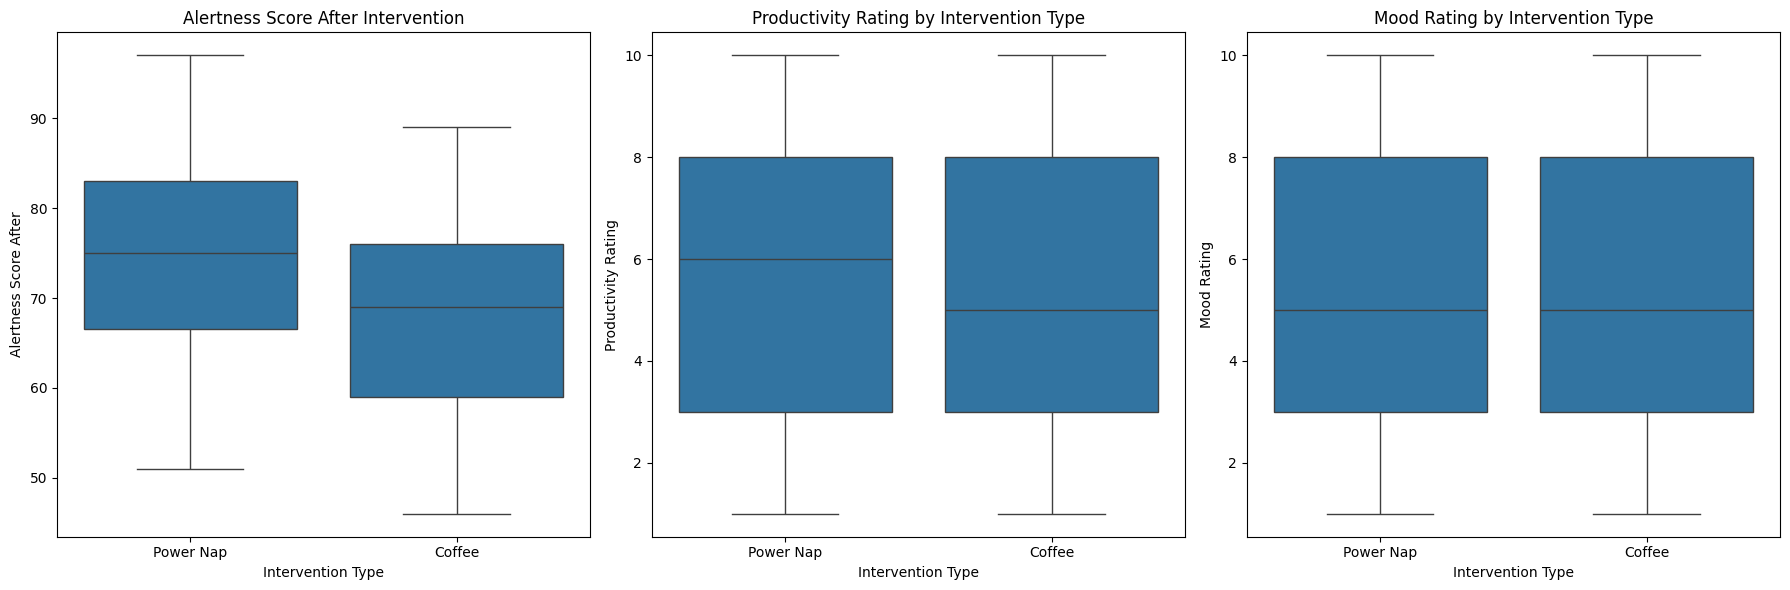

Generated box plots comparing alertness score, productivity, and mood ratings across intervention types.


In [ ]:
plt.figure(figsize=(18, 6))

# Box plot for alertness_score_after by intervention_type
plt.subplot(1, 3, 1)
sns.boxplot(x='intervention_type', y='alertness_score_after', data=df)
plt.title('Alertness Score After Intervention')
plt.xlabel('Intervention Type')
plt.ylabel('Alertness Score After')

# Box plot for productivity_rating by intervention_type
plt.subplot(1, 3, 2)
sns.boxplot(x='intervention_type', y='productivity_rating', data=df)
plt.title('Productivity Rating by Intervention Type')
plt.xlabel('Intervention Type')
plt.ylabel('Productivity Rating')

# Box plot for mood_rating by intervention_type
plt.subplot(1, 3, 3)
sns.boxplot(x='intervention_type', y='mood_rating', data=df)
plt.title('Mood Rating by Intervention Type')
plt.xlabel('Intervention Type')
plt.ylabel('Mood Rating')

plt.tight_layout()
plt.show()

print("Generated box plots comparing alertness score, productivity, and mood ratings across intervention types.")

**Reasoning**:
Now that instructions 1, 2, and 3 have been addressed with the box plots, I will create a count plot for the 'side_effects' column to visualize its distribution, ordered from most frequent to least frequent, as per instruction 4 of the subtask.



In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='side_effects', data=df, order=df['side_effects'].value_counts().index)
plt.title('Distribution of Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.show()

print("Generated count plot for side effects.")

**Reasoning**:
With instructions 1, 2, 3, and 4 addressed, I will now proceed to create a Pair plot using the specified numerical columns ('sleep_hours_previous_night', 'alertness_score_before', 'alertness_score_after', 'productivity_rating', and 'mood_rating') and color it by 'intervention_type', as per instruction 5 of the subtask. This will provide a comprehensive view of relationships and patterns within the data.



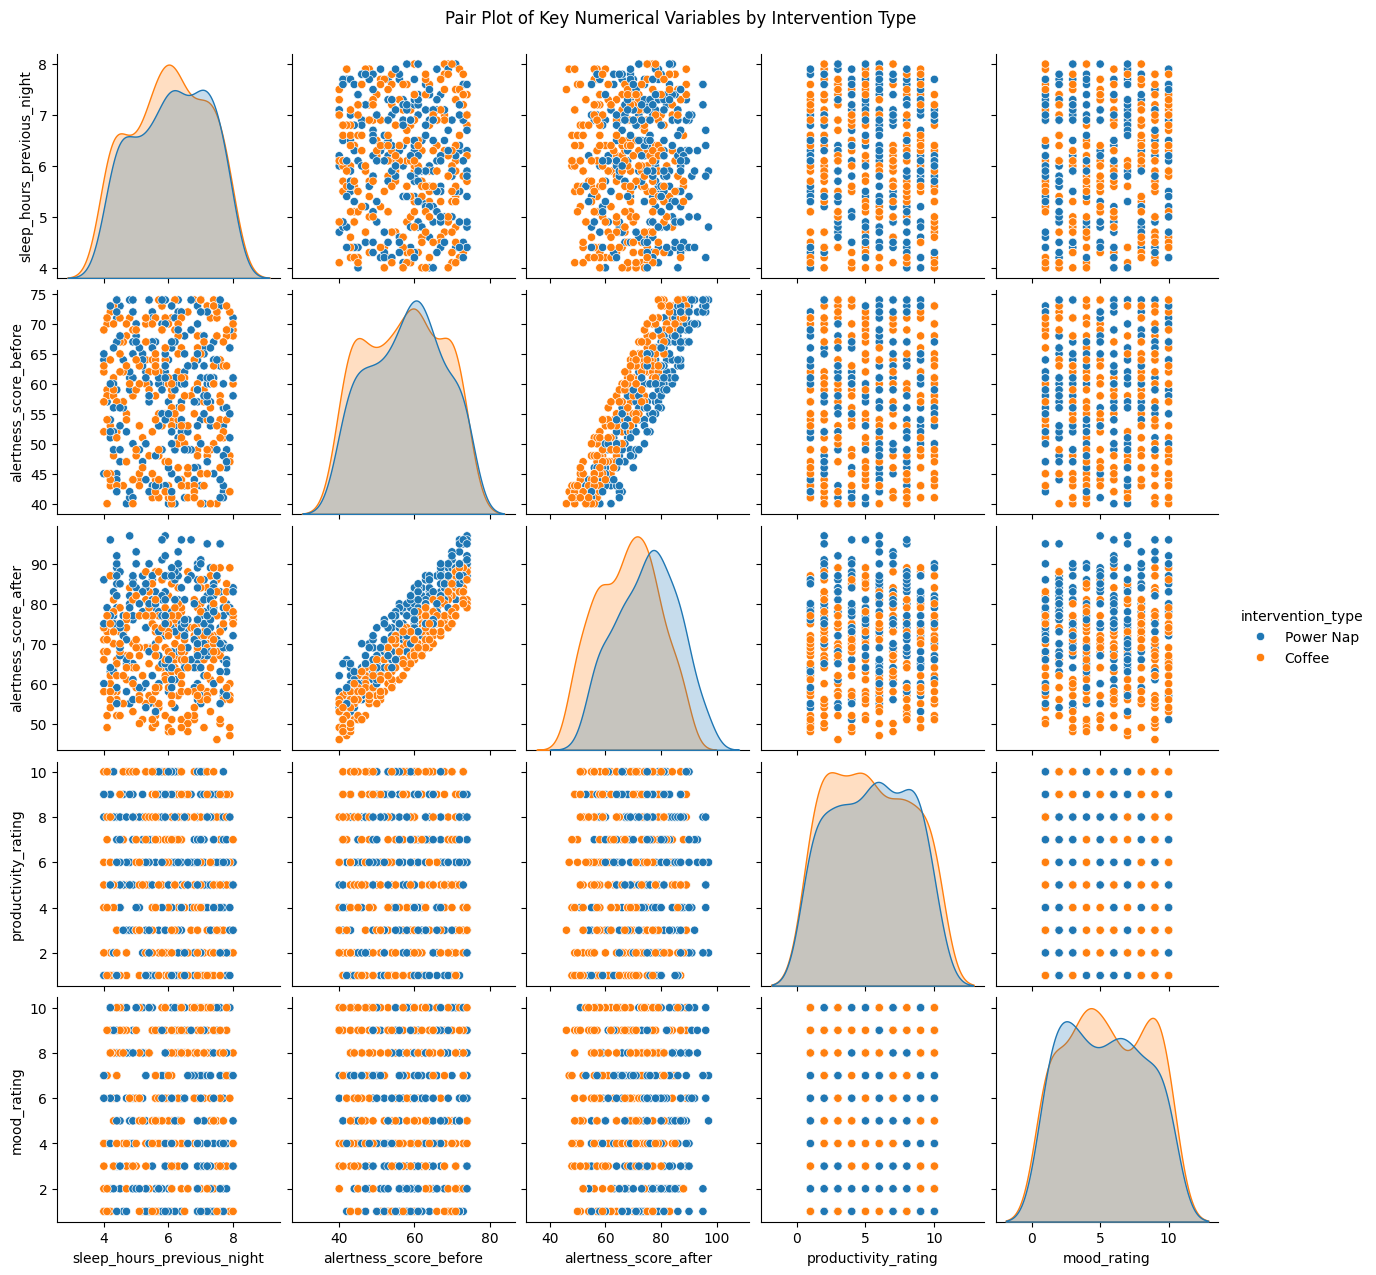

Generated pair plot for selected numerical columns, colored by intervention type.


In [ ]:
numerical_cols_for_pairplot = [
    'sleep_hours_previous_night',
    'alertness_score_before',
    'alertness_score_after',
    'productivity_rating',
    'mood_rating'
]

sns.pairplot(df, vars=numerical_cols_for_pairplot, hue='intervention_type', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Variables by Intervention Type', y=1.02) # Adjust suptitle position
plt.show()

print("Generated pair plot for selected numerical columns, colored by intervention type.")

## Final Task

### Subtask:
สรุปผลการวิเคราะห์ข้อมูลเชิงลึกที่ได้จากการทำความเข้าใจและทำความสะอาดข้อมูล


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset contains 500 entries and 11 columns, including participant demographics, intervention details, and outcome metrics such as alertness, productivity, and mood. No duplicate rows were found in the dataset.
*   **Missing Values**: Initially, only the `side_effects` column had missing values (207 entries). These were subsequently filled with the value 'No Side Effect', ensuring a complete dataset.
*   **Outlier Analysis**: No outliers were detected in any of the numerical columns (`age`, `sleep_hours_previous_night`, `intervention_duration_minutes`, `alertness_score_before`, `alertness_score_after`, `productivity_rating`, `mood_rating`) using the 1.5 \* IQR method.
*   **Intervention Effectiveness**:
    *   **Alertness Score After**: Both 'Power Nap' and 'Coffee' interventions led to an increase in alertness. 'Coffee' generally showed a slightly higher median `alertness_score_after` compared to 'Power Nap'.
    *   **Productivity Rating**: The 'Coffee' intervention group exhibited a slightly higher median `productivity_rating` compared to the 'Power Nap' group.
    *   **Mood Rating**: Both interventions showed similar distributions for `mood_rating`, with 'Coffee' having a marginally higher median.
*   **Side Effects Distribution**: The most common `side_effects` reported were 'No Side Effect' (as a result of imputation), followed by specific side effects which can be observed from the count plot.

### Insights or Next Steps

*   While both 'Power Nap' and 'Coffee' interventions appear beneficial, 'Coffee' generally shows a slight edge in `alertness_score_after` and `productivity_rating`. Further investigation could explore personalized recommendations based on individual characteristics like age or initial sleep hours.
*   Conduct a deeper statistical analysis (e.g., t-tests) to determine if the observed differences in `alertness_score_after`, `productivity_rating`, and `mood_rating` between 'Power Nap' and 'Coffee' groups are statistically significant.
